In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [293]:
df = pd.read_csv('bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [294]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [296]:
df.shape

(252, 15)

<AxesSubplot:xlabel='Wrist'>

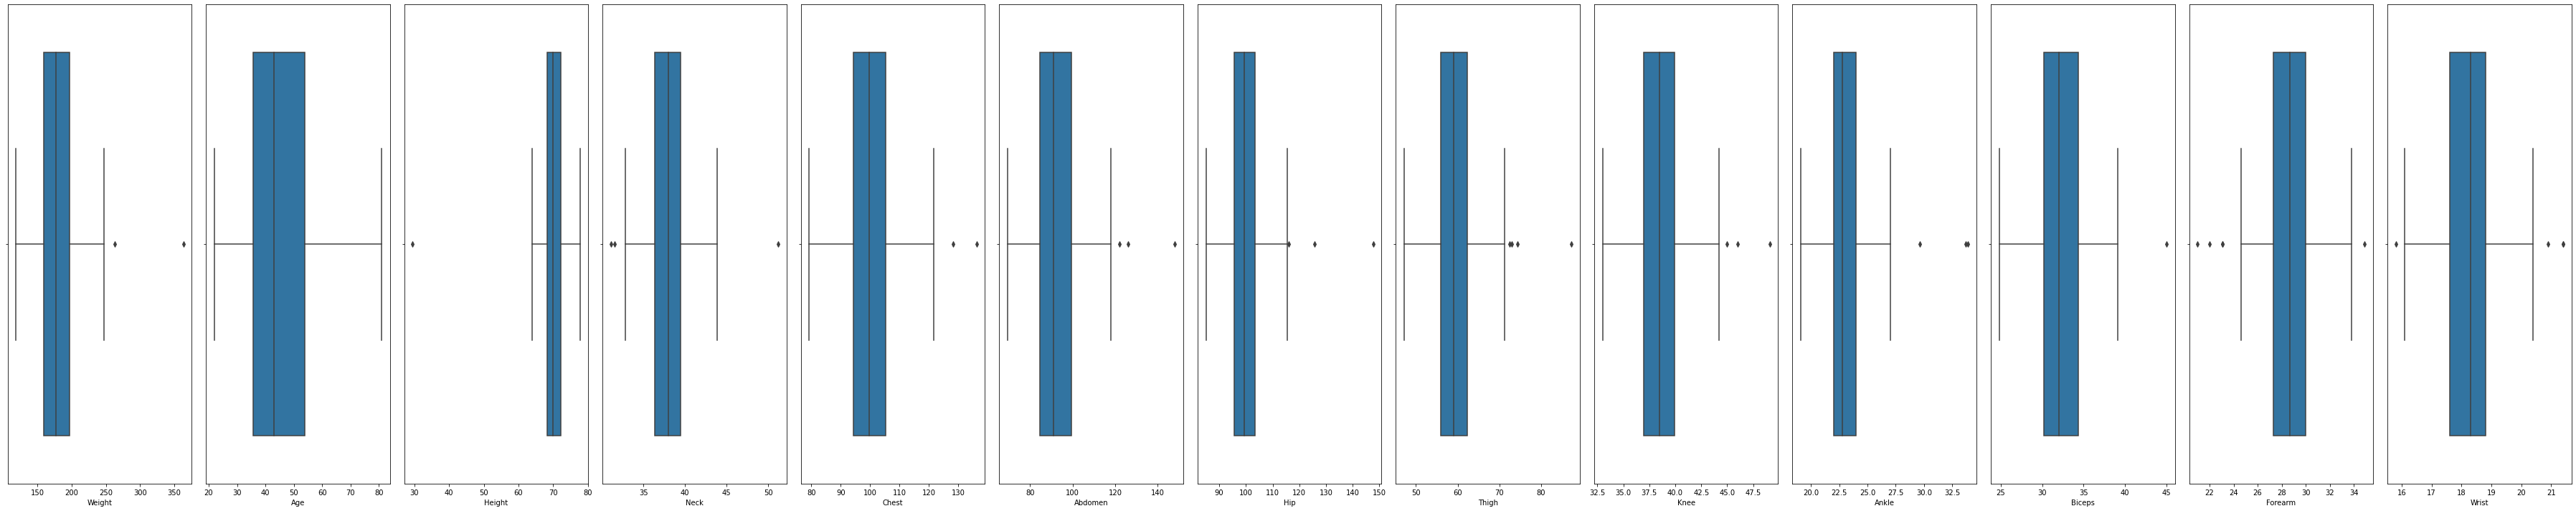

In [297]:
plt.rcParams["figure.figsize"] = [50, 10]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1,13)
sns.boxplot(x = 'Weight', data=df, ax=axes[0])
sns.boxplot(x = 'Age', data=df, ax=axes[1])
sns.boxplot(x = 'Height', data=df, ax=axes[2])
sns.boxplot(x = 'Neck', data=df, ax=axes[3])
sns.boxplot(x = 'Chest', data=df, ax=axes[4])
sns.boxplot(x = 'Abdomen', data=df, ax=axes[5])
sns.boxplot(x = 'Hip', data=df, ax=axes[6])
sns.boxplot(x = 'Thigh', data=df, ax=axes[7])
sns.boxplot(x = 'Knee', data=df, ax=axes[8])
sns.boxplot(x = 'Ankle', data=df, ax=axes[9])
sns.boxplot(x = 'Biceps', data=df, ax=axes[10])
sns.boxplot(x = 'Forearm', data=df, ax=axes[11])
sns.boxplot(x = 'Wrist', data=df, ax=axes[12])


In [320]:
def remove_outliers(df, col, k):
    mean = df[col].mean()
    global df1
    sd =df[col].std()
    finallist = [x for x in df[col] if(x > mean -k * sd)]
    finallist = [x for x in finallist if(x < mean +k *sd)]
    df1 = df.loc[df[col].isin(finallist)]
    print(df.shape)
    print(df1.shape)
    print("Outliers Removed = ", df.shape[0] - df1.shape[0])

remove_outliers(df,"Wrist", 2.5)
df = df1.copy()

(226, 15)
(224, 15)
Outliers Removed =  2


In [321]:
df.shape

(224, 15)

In [359]:
y = df['BodyFat']
X = df.drop(['BodyFat', 'Density'], axis=1)

In [342]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

In [360]:
# X = sc.fit_transform(X)

In [361]:
X

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,69,215.50,70.50,40.8,113.7,107.6,110.0,63.3,44.0,22.6,37.5,32.6,18.8
247,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0


In [362]:
y.shape

(224,)

In [363]:
X.shape

(224, 13)

In [364]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [365]:
y_test.shape

(45,)

In [366]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

In [367]:
lin.fit(X_train, y_train)

LinearRegression()

In [368]:
from sklearn.linear_model import Lasso
LASSO=Lasso(alpha=0.5)
LASSO.fit(X_train,y_train)

Lasso(alpha=0.5)

In [369]:
from sklearn.linear_model import Ridge
RIDGE=Ridge(alpha=0.5)
RIDGE.fit(X_train,y_train)

Ridge(alpha=0.5)

In [370]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)

DecisionTreeRegressor()

In [371]:
from sklearn.svm import SVR
svm=SVR(kernel="rbf")
svm.fit(X_train,y_train)

SVR()

In [372]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators =10)
RFR.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [373]:
N = x_train.shape[0]
K = x_train.shape[1]
models=[lin,LASSO,RIDGE,DTR,svm,RFR]
name=["LR","LASSO","RIDGE","DTR","svm","RFR"]
for i,model in enumerate(models):
    ac=model.score(X_test,y_test)
    print(f"model => {name[i]}")
    print('  Rsquare: ', ac*100)
    print('  AdjRsquare: ', (1 - ( 1- ac) * (N-1)/(N-K-1))*100)

model => LR
  Rsquare:  66.41636452304479
  AdjRsquare:  63.88856400327396
model => LASSO
  Rsquare:  66.4984076590296
  AdjRsquare:  63.97678242906407
model => RIDGE
  Rsquare:  66.46322772996719
  AdjRsquare:  63.93895454835181
model => DTR
  Rsquare:  34.33300330261508
  AdjRsquare:  29.39032613184418
model => svm
  Rsquare:  34.11999440709227
  AdjRsquare:  29.16128430870136
model => RFR
  Rsquare:  62.99074990826069
  AdjRsquare:  60.205107428237305


In [374]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error, mean_squared_error

models=[lin,LASSO,RIDGE,DTR,svm,RFR]
name=["LR","LASSO","RIDGE","DTR","svm","RFR"]
for i,model in enumerate(models):
    pred_test = model.predict(X_test)
    MAE = mean_absolute_error(y_test, pred_test)
    MAPE = mean_absolute_percentage_error(y_test, pred_test)
    MSE = mean_squared_error(y_test, pred_test)
    RMSE = np.sqrt(MSE)
    print(f"model => {name[i]}")
    print('   MAE: ', MAE)
    print('   MAPE: ', MAPE)
    print('   MSE: ', MSE)
    print('   RMSE: ', RMSE)

    

model => LR
   MAE:  3.811090339662907
   MAPE:  0.29810860570569075
   MSE:  21.557858024764965
   RMSE:  4.643044047256602
model => LASSO
   MAE:  3.7795396042650844
   MAPE:  0.29575736221341203
   MSE:  21.505193259549763
   RMSE:  4.637369217514362
model => RIDGE
   MAE:  3.807723206105559
   MAPE:  0.29784348033593494
   MSE:  21.52777580325826
   RMSE:  4.639803422911175
model => DTR
   MAE:  5.388888888888888
   MAPE:  0.36055238102714954
   MSE:  42.15266666666666
   RMSE:  6.492508503395792
model => svm
   MAE:  5.479427531204006
   MAPE:  0.4763073381679479
   MSE:  42.28940039017447
   RMSE:  6.50303009297777
model => RFR
   MAE:  4.149777777777778
   MAPE:  0.32152334543043803
   MSE:  23.75681333333333
   RMSE:  4.8740961555280515


C:\Users\91957\anaconda3\envs\bodyfat\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\91957\anaconda3\envs\bodyfat\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users

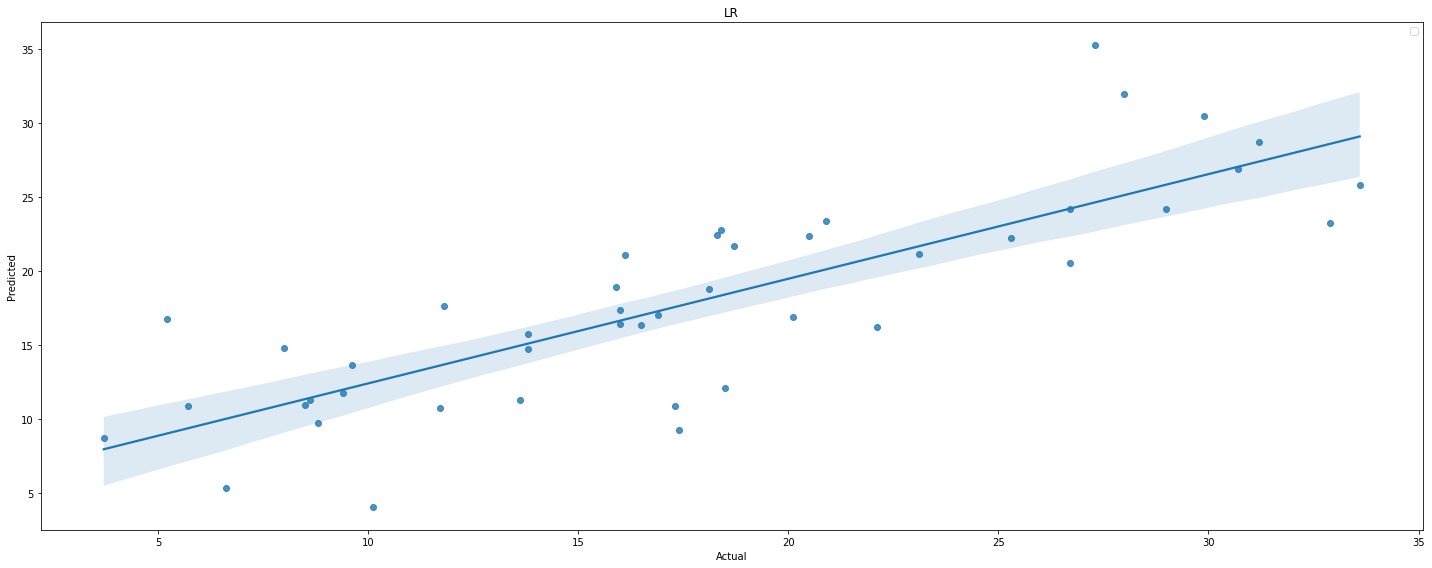

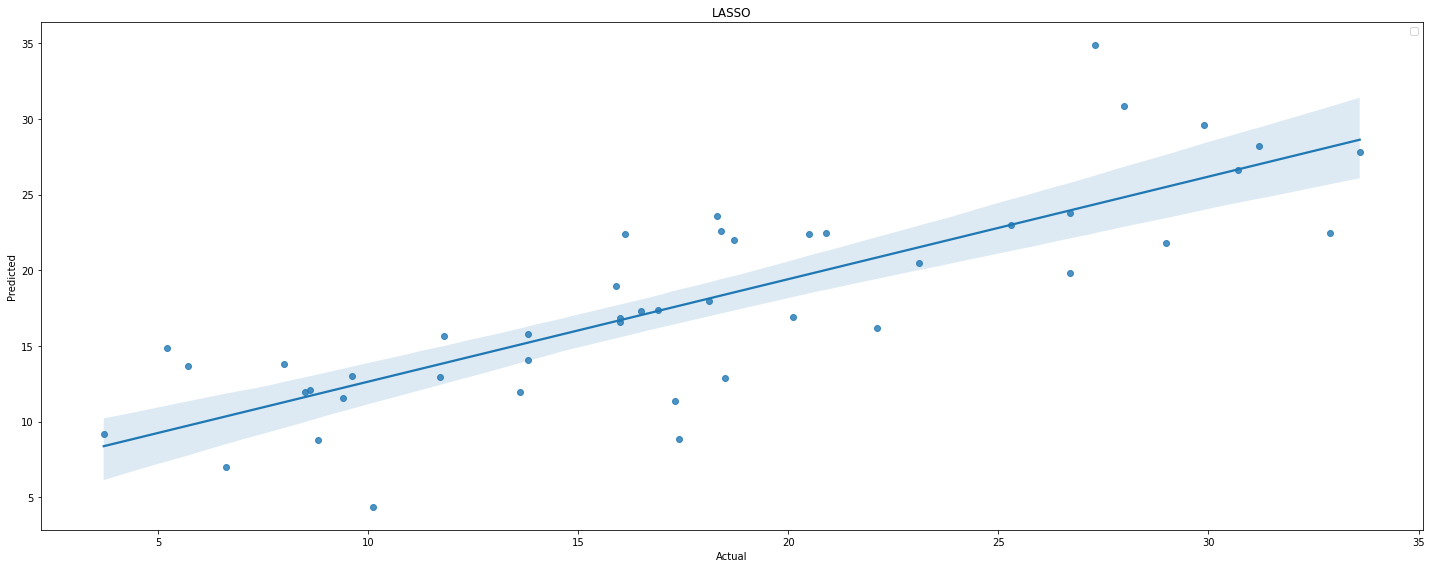

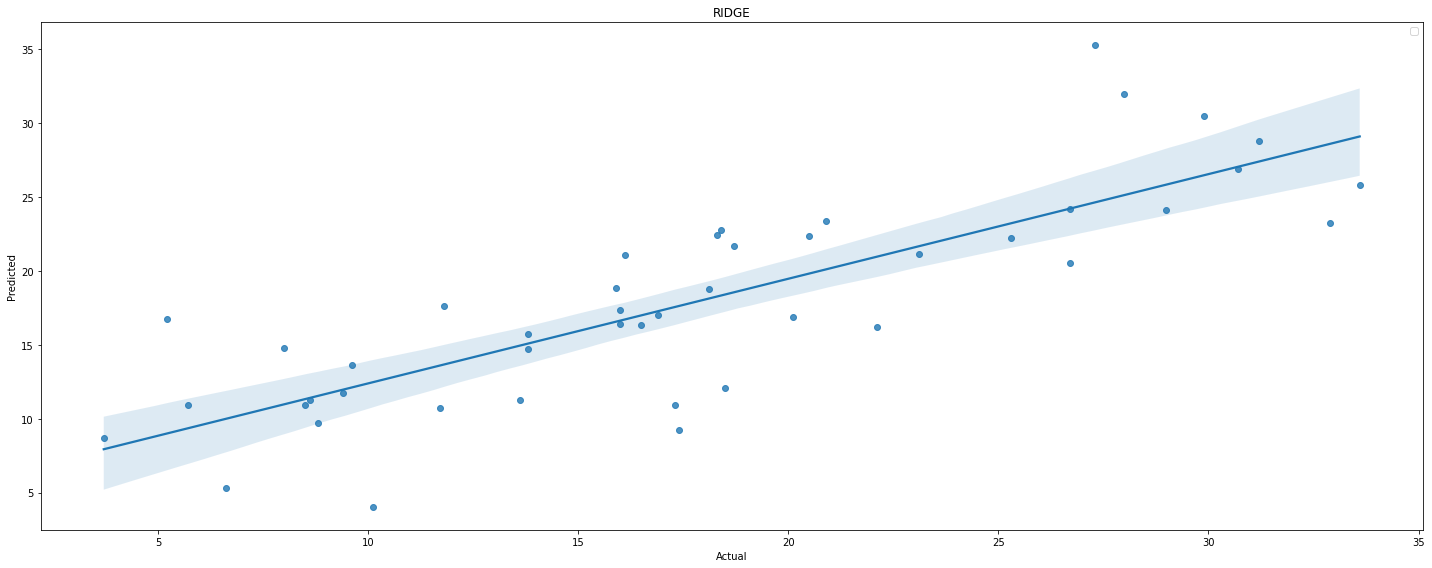

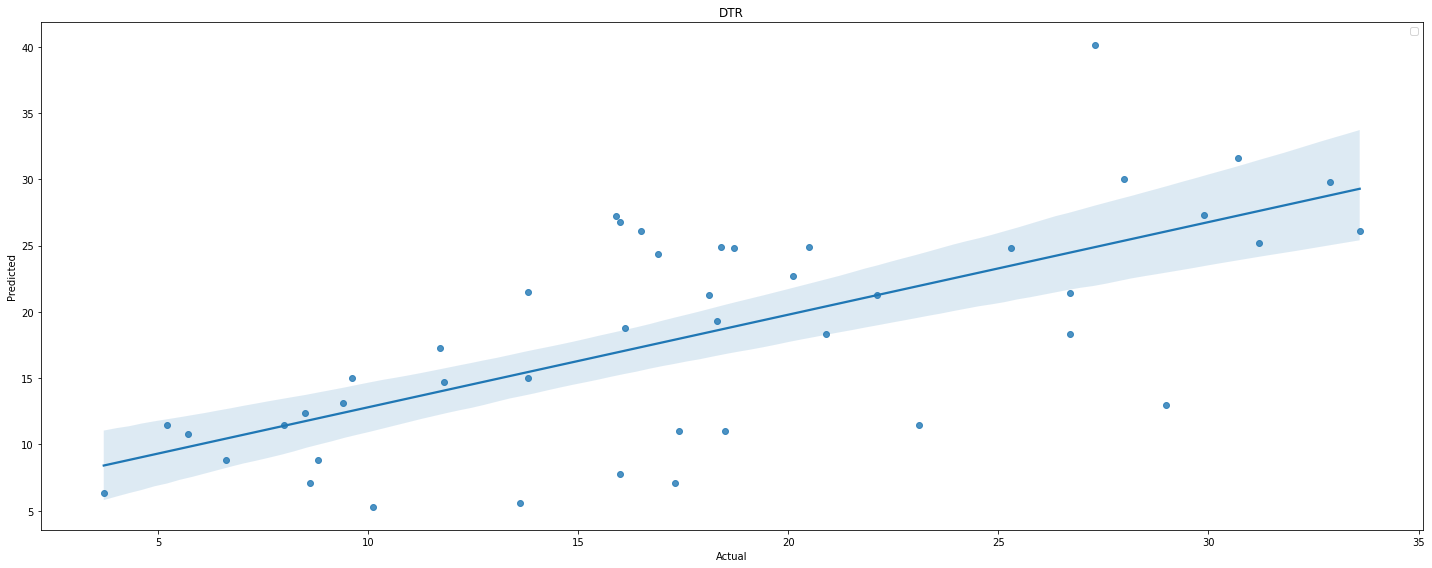

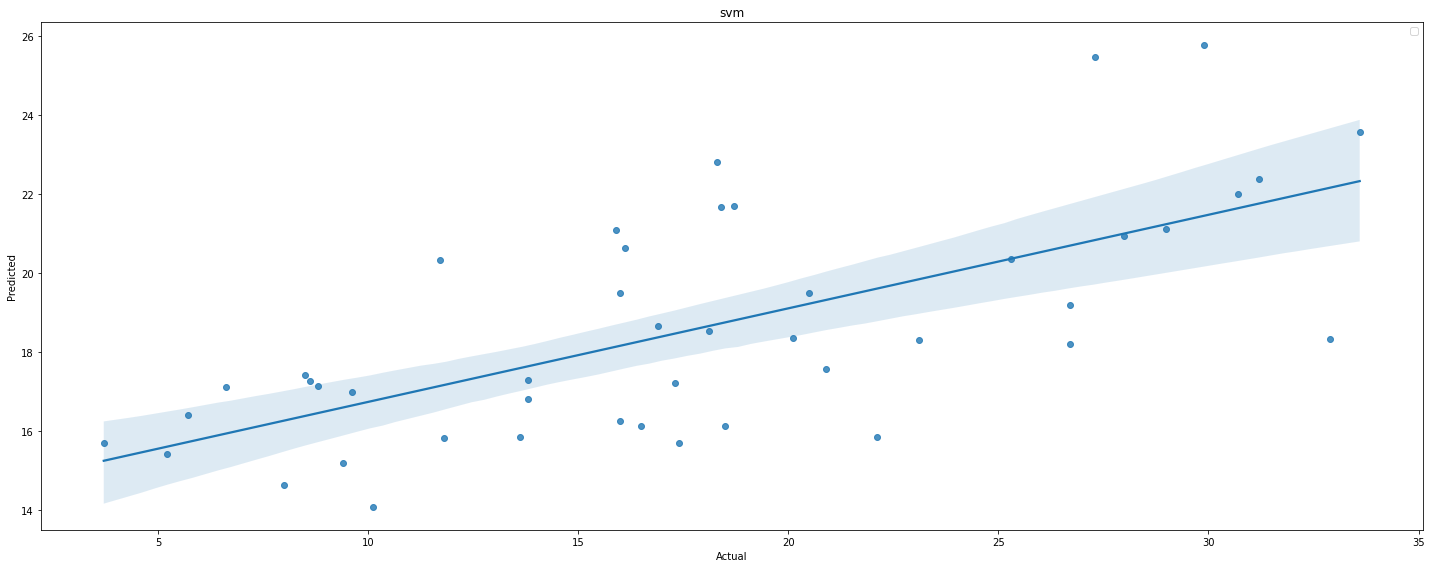

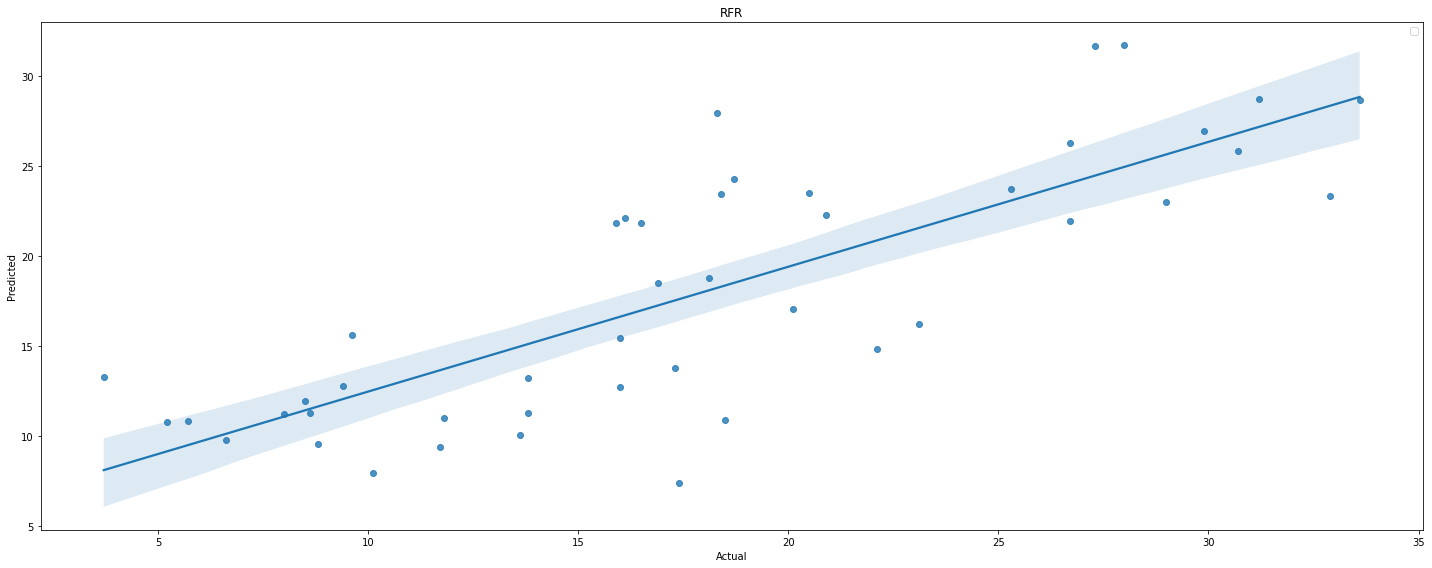

In [375]:
models=[lin,LASSO,RIDGE,DTR,svm,RFR]
name=["LR","LASSO","RIDGE","DTR","svm","RFR"]
for i,model in enumerate(models):
    pred_test = model.predict(X_test)
    pred_actual = pd.DataFrame({'Actual': y_test, 'Predicted': pred_test})
    plt.figure(figsize=(20,8))
    plt.title(name[i])
    sns.regplot( 'Actual','Predicted', data = pred_actual);
    plt.legend();

In [376]:
### Hence it looks like RIGDE has worked really well, Hence using RIDGE for deployment

import pickle
pickle.dump(LASSO, open('bodyfat.pkl', 'wb'))